<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer ID     30 non-null     object
 1   Age             30 non-null     int64 
 2   Annual Income   30 non-null     int64 
 3   Spending Score  30 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.1+ KB
First 5 Rows of the dataset:
  Customer ID  Age  Annual Income  Spending Score
0    CUST0001   56          45658              81
1    CUST0002   69         104478              36
2    CUST0003   46          38431              50
3    CUST0004   32          22747               4
4    CUST0005   60          79150               2

 Missing Values in Dataset:

First 5 Rows of scaled features:
[[ 1.03138361 -0.80985741  0.87838495]
 [ 2.00297686  1.25104996 -0.59835189]
 [ 0.28400418 -1.06307363 -0.13892265]
 [-0.76232701 -1.61260221 -1.64847587]
 [ 1.33033537  0.36361946 -1.7141086

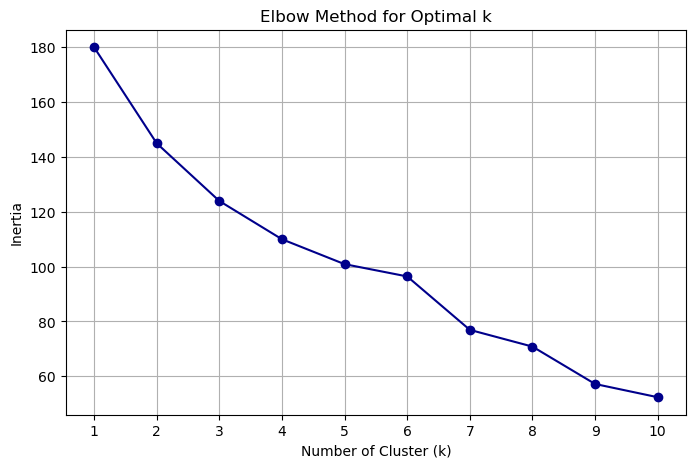

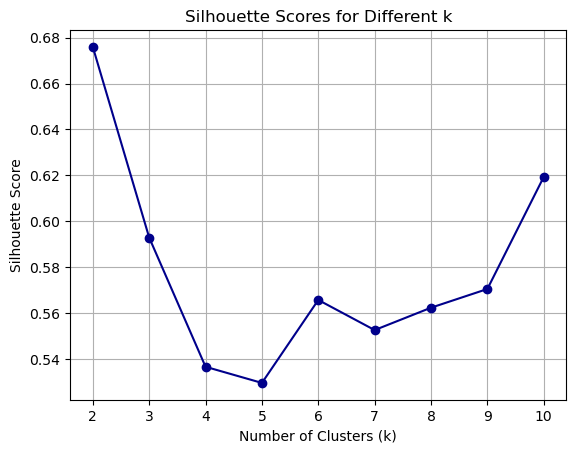


 First 5 rows with cluster labels:
  Customer ID  Age  Annual Income  Spending Score  Cluster
0    CUST0001   56          45658              81        2
1    CUST0002   69         104478              36        1
2    CUST0003   46          38431              50        1
3    CUST0004   32          22747               4        2
4    CUST0005   60          79150               2        2


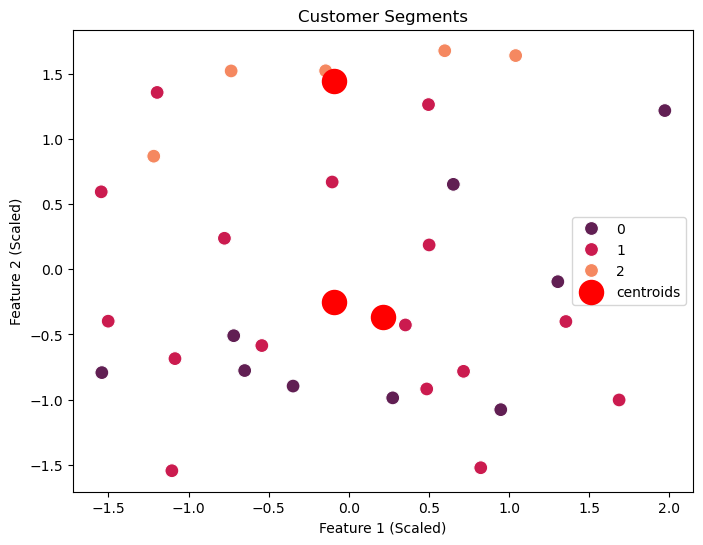

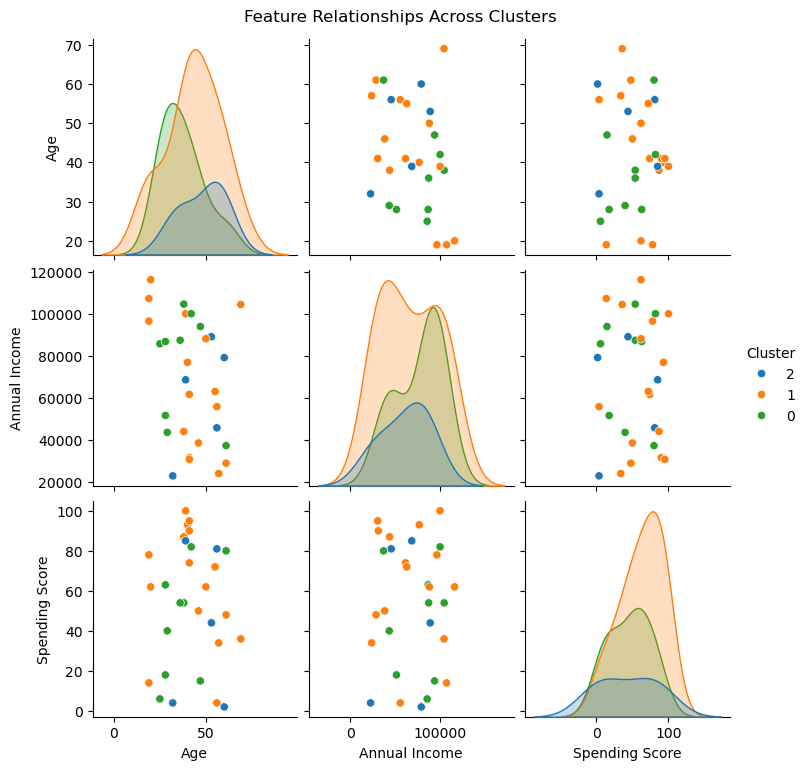

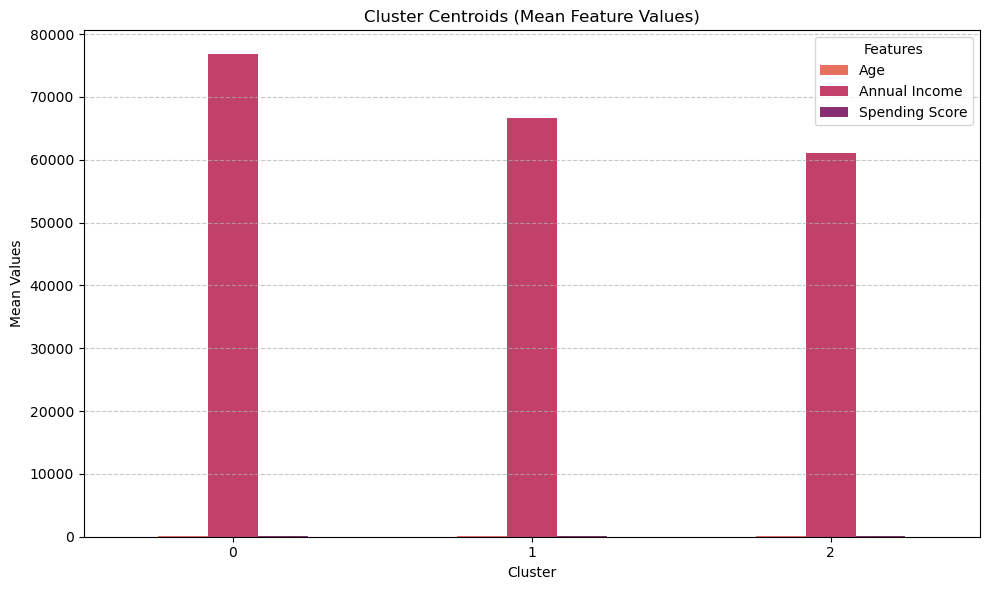

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as mlt 
import seaborn as sns 

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('customer_data.csv')
data.info()

print("First 5 Rows of the dataset:")
print(data.head())

print("\n Missing Values in Dataset:")
data.isnull().sum()

features = data[['Age','Annual Income','Spending Score']]

#standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

print("\nFirst 5 Rows of scaled features:")
print(scaled_features[:5])

#Elbow Method to find the optimal number of clusters 
numeric_data = np.random.rand(30, 6)
inertia = []
k_range = range(1,11)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_data)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

#Elbow Method Graph
mlt.figure(figsize=(8,5))
mlt.plot(k_range, inertia, marker= "o", color = "Darkblue")
mlt.title("Elbow Method for Optimal k")
mlt.xlabel("Number of Cluster (k)")
mlt.ylabel('Inertia')
mlt.grid(True)
mlt.xticks(k_range)
mlt.show()

from sklearn.metrics import silhouette_score
silhouette_scores = []
X = data[['Age', 'Annual Income', 'Spending Score']]
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

mlt.plot(range(2, 11), silhouette_scores, marker='o', color = 'Darkblue')
mlt.title("Silhouette Scores for Different k")
mlt.xlabel("Number of Clusters (k)")
mlt.ylabel("Silhouette Score")
mlt.grid(True)
mlt.show()

#K-Means cluster with optimal k from Elbow method (assuming k=3)
optimal_k = 3
kmeans = KMeans(n_clusters = optimal_k, random_state = 42)
cluster_labels = kmeans.fit_predict(scaled_features)

#cluster labels to the original dataset
data['Cluster'] = cluster_labels

print("\n First 5 rows with cluster labels:")
print(data.head())

#Cluster using first two features for plotting
mlt.figure(figsize = (8,6))
sns.scatterplot(x = scaled_features[:, 0],
                y = scaled_features[:, 1], 
                hue = cluster_labels, 
                palette = sns.color_palette("rocket", n_colors=3),
                s= 100)
mlt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s = 300, c = 'red', label = 'centroids')
mlt.title("Customer Segments")
mlt.xlabel("Feature 1 (Scaled)")
mlt.ylabel("Feature 2 (Scaled)")
mlt.legend()
mlt.show()

#Pair Plots: Visualize relationships between features within clusters
data['Cluster'] = data['Cluster'].astype(str)

sns.pairplot(data, hue='Cluster', vars=['Age', 'Annual Income', 'Spending Score'])
mlt.suptitle('Feature Relationships Across Clusters', y=1.02)
mlt.show()

centroid_data = data.groupby('Cluster')[['Age', 'Annual Income', 'Spending Score']].mean()

# Plot the centroids
ax = centroid_data.plot(kind='bar', figsize=(10, 6), 
     color = sns.color_palette("flare", n_colors=3))
mlt.title("Cluster Centroids (Mean Feature Values)")
mlt.ylabel("Mean Values")
mlt.xticks(rotation=0)
mlt.grid(axis='y', linestyle='--', alpha=0.7)
mlt.legend(title="Features")
mlt.tight_layout()
mlt.show()